In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import requests

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [3]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/clone.json?'

start = datetime.date(2017,1,1)
end = datetime.date(2022,2,1)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [4]:
data = pd.read_json(result.content).iloc[:-2,:1]

data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2022-01-28,37740.7367
2022-01-29,38186.3700
2022-01-30,37915.8983


<AxesSubplot:xlabel='date'>

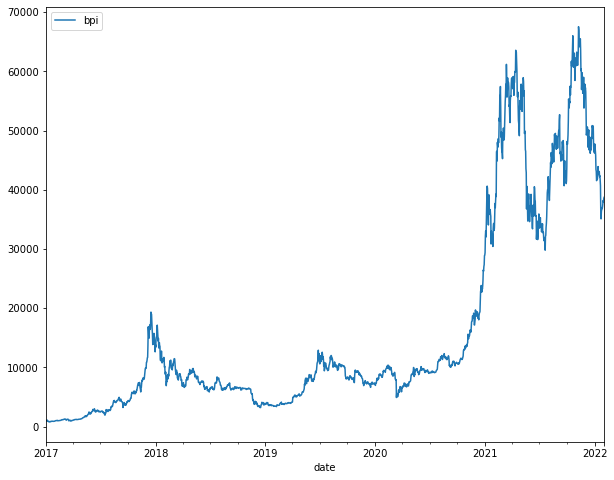

In [5]:
data.plot()

In [6]:
## Shortcuts
''''D Calender day
B Business day
W Weekly
M Month
Q Quarter
A Year end
H Hours
T Minutes
S seconds'''

"'D Calender day\nB Business day\nW Weekly\nM Month\nQ Quarter\nA Year end\nH Hours\nT Minutes\nS seconds"

In [8]:
data.resample('Q').mean()

,bpi
date,
2017-03-31,1034.169242
2017-06-30,1919.658520
2017-09-30,3506.611449
2017-12-31,9413.347972
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959


<AxesSubplot:xlabel='date'>

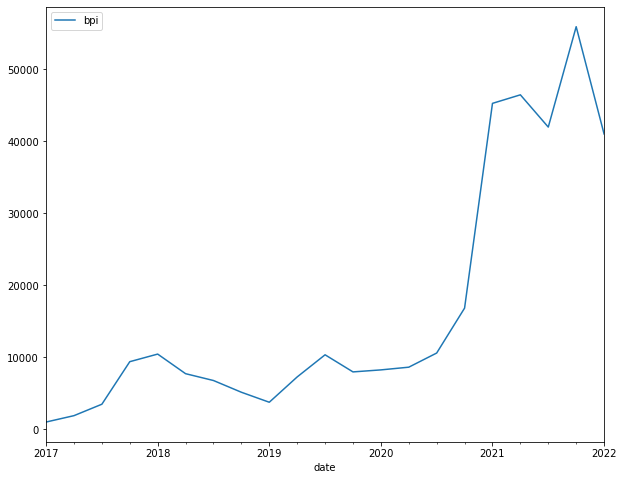

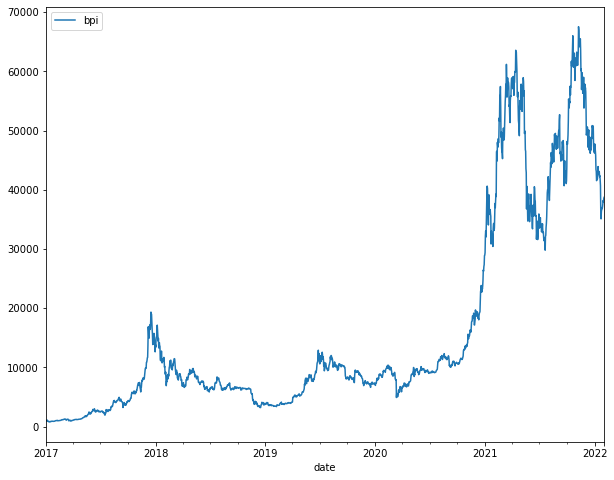

In [12]:
## Quarterly Check
data.resample('Q').mean().plot()
## Day Check
data.resample('D').mean().plot()

<AxesSubplot:xlabel='date'>

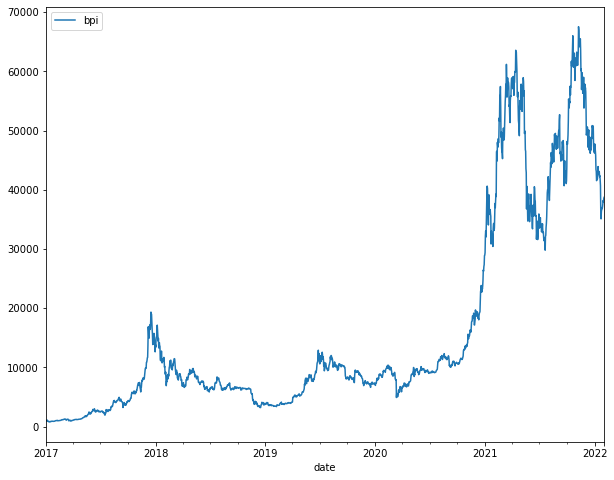

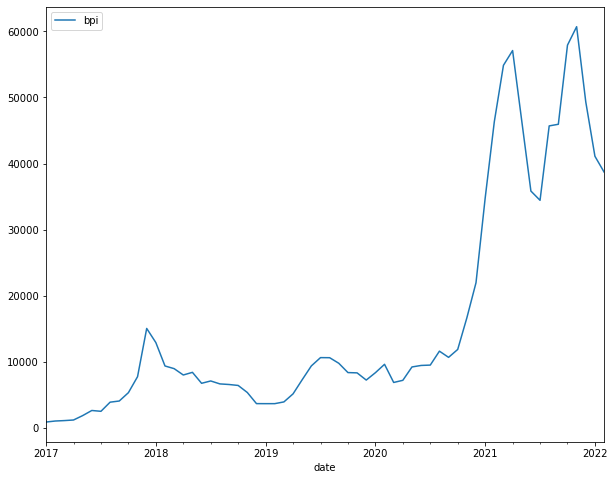

In [11]:
## Monthly Check
data.plot()
data.resample('M').mean().plot()

In [13]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [14]:
# diff() funcrion take the data and sub from previous data
data[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [15]:
data[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


<AxesSubplot:xlabel='date'>

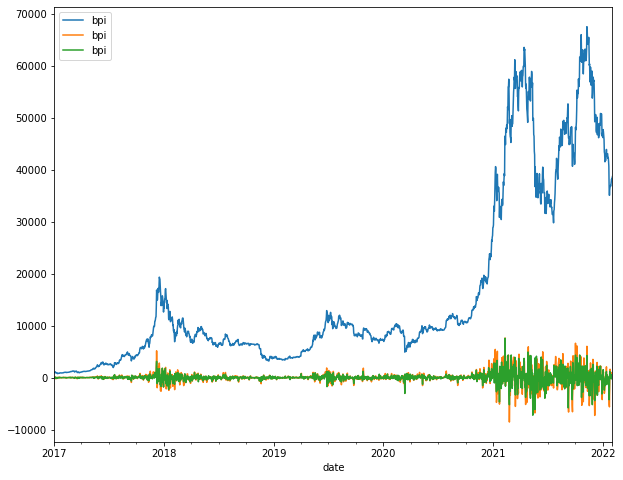

In [16]:
pd.concat([data['bpi'], data['bpi'].diff(2), data['bpi'].diff()], axis=1).plot()

In [18]:
## shift() function is used to shift the data points by 1 value
## diff() function do the difference between data points
## tshift() is time shift(date shift).
data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


In [19]:
## tshift() is time shift. The data is shift by 2. Date will be shift not month

data[:5].tshift(2)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_75296/1157701463.py:3: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  data[:5].tshift(2)


,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [21]:
# this step we have already implemented using diff() function
data[:5] - data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [22]:
# this step we have already implemented using diff() function. diff of 2 data points
data[:5] - data[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_75296/3162218987.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  pd.concat([data,data-data.shift(), data.tshift(365)], axis=1).plot()


<AxesSubplot:xlabel='date'>

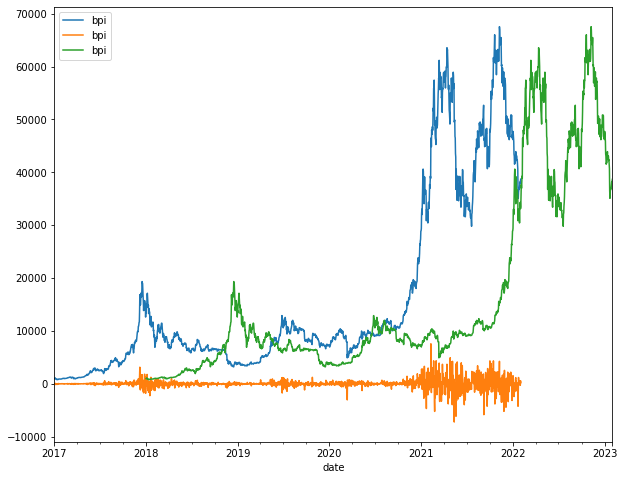

In [23]:
pd.concat([data,data-data.shift(), data.tshift(365)], axis=1).plot()

<AxesSubplot:xlabel='date'>

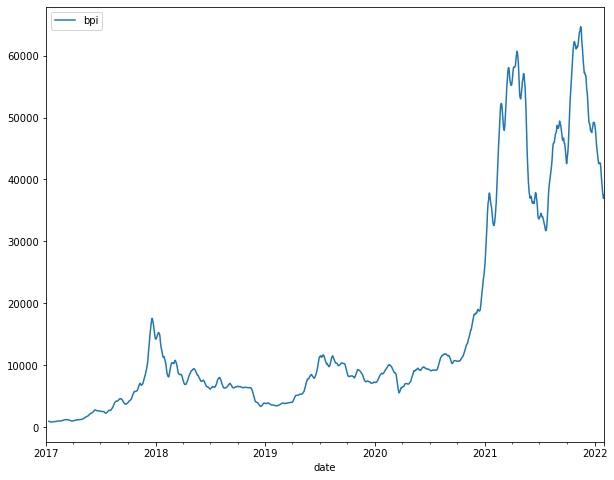

In [25]:
# rolling window takes the average. window 10 means it takes last 10 data point's average
data.rolling(window=10).mean().plot()

<AxesSubplot:xlabel='date'>

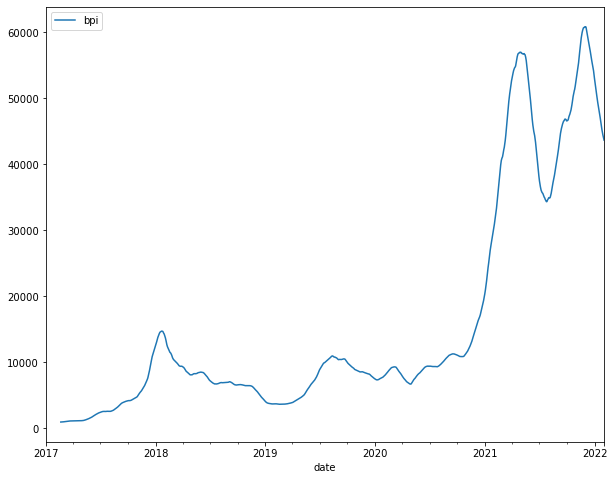

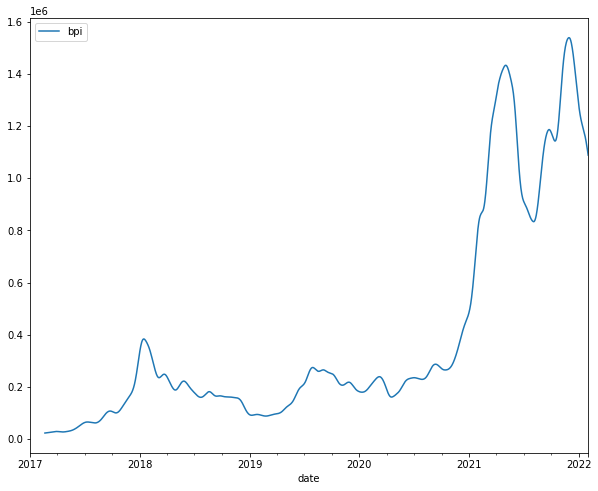

In [26]:
data.rolling(window=50).mean().plot()
data.rolling(window=50, win_type='gaussian').sum(std=10).plot()

<AxesSubplot:xlabel='date'>

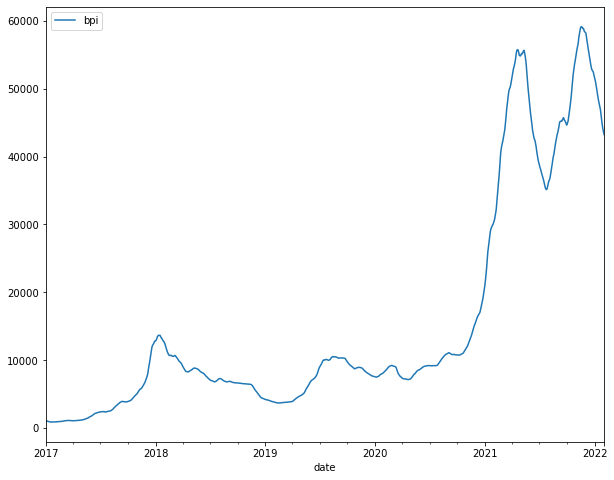

In [27]:
data.ewm(span=50).mean().plot()

<AxesSubplot:xlabel='date'>

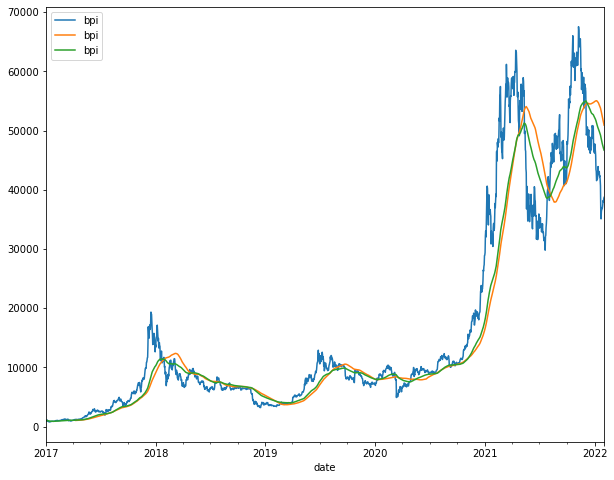

In [32]:
pd.concat([data,data.rolling(window=100).mean(), data.ewm(span=100).mean()], axis=1).plot()

In [34]:
data.head()

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


# How can we group data in week, month or year level

In [36]:
# weekly group data
data.groupby(data.index.dayofweek).mean()

,bpi
date,
0,15946.190614
1,15936.699282
2,15905.198352
3,15877.297848
4,15924.449007
5,15964.290324
6,15920.391652


In [38]:
# monthly group data
data.groupby(data.index.month).mean()

,bpi
date,
1,16959.558799
2,14164.088402
3,15165.095852
4,15745.089671
5,14663.634014
6,12828.100683
7,12854.792858
8,15711.327941
9,15422.166896


In [39]:
# Yearly group data
data.groupby(data.index.year).mean()

,bpi
date,
2017,3990.138147
2018,7529.385702
2019,7379.960562
2020,11110.755804
2021,47426.826825
2022,41028.440056
